<a href="https://colab.research.google.com/github/Ankur941/GitHub-Practice-184/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction
### Real Estate price movement is pretty important when someone trying to invest into it. It is important to know what causes price to drive up and down. Which is what motivated me into doing this project.


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from datetime import date


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler


from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import missingno as msno
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.options.display.float_format = '{:.2f}'.format

# First Glance

In [ ]:
#getting the csvs
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

**Checking Train Data**

In [ ]:

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)


    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_train)

##################### Shape #####################
(1460, 81)
##################### NA #####################
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC   

**Checking Test Data**

In [ ]:

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_test)

##################### Shape #####################
(1459, 80)
##################### NA #####################
Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC   

# EDA

**Concat train and test data**

In [ ]:
#concantanating the train and test into one data frame for ease of use
df = pd.concat([df_train, df_test], axis=0)

**Finding Numerical and Categorical Variables**


In [ ]:
def grab_col_names(dataframe, cat_th=40, car_th=30):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 61
num_cols: 20
cat_but_car: 0
num_but_cat: 18


**View the numerical variables**

In [ ]:
df[num_cols].nunique().sort_values(ascending=False)

Id               2919
LotArea          1951
GrLivArea        1292
BsmtUnfSF        1135
1stFlrSF         1083
TotalBsmtSF      1058
BsmtFinSF1        991
SalePrice         663
2ndFlrSF          635
GarageArea        603
MasVnrArea        444
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       252
EnclosedPorch     183
LotFrontage       128
ScreenPorch       121
YearBuilt         118
GarageYrBlt       103
YearRemodAdd       61
dtype: int64

**View the categorical variables**

In [ ]:
df[cat_cols].nunique().sort_values(ascending=False)

MiscVal          38
LowQualFinSF     36
3SsnPorch        31
Neighborhood     25
Exterior2nd      16
MSSubClass       16
Exterior1st      15
PoolArea         14
TotRmsAbvGrd     14
MoSold           12
OverallQual      10
OverallCond       9
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
BedroomAbvGr      8
Functional        7
Foundation        6
GarageType        6
RoofStyle         6
BsmtFinType1      6
BsmtFinType2      6
Heating           6
SaleCondition     6
GarageCars        6
FullBath          5
Fireplaces        5
GarageCond        5
GarageQual        5
MSZoning          5
YrSold            5
FireplaceQu       5
Electrical        5
LotConfig         5
BldgType          5
HeatingQC         5
ExterCond         5
BsmtQual          4
LotShape          4
LandContour       4
KitchenAbvGr      4
ExterQual         4
BsmtFullBath      4
BsmtCond          4
BsmtExposure      4
MiscFeature       4
Fence             4
KitchenQual       4


# Analyzing the  Categorical Variables
### So to give us an idea of different features and their distribution

**Graph of Cat_Cols**

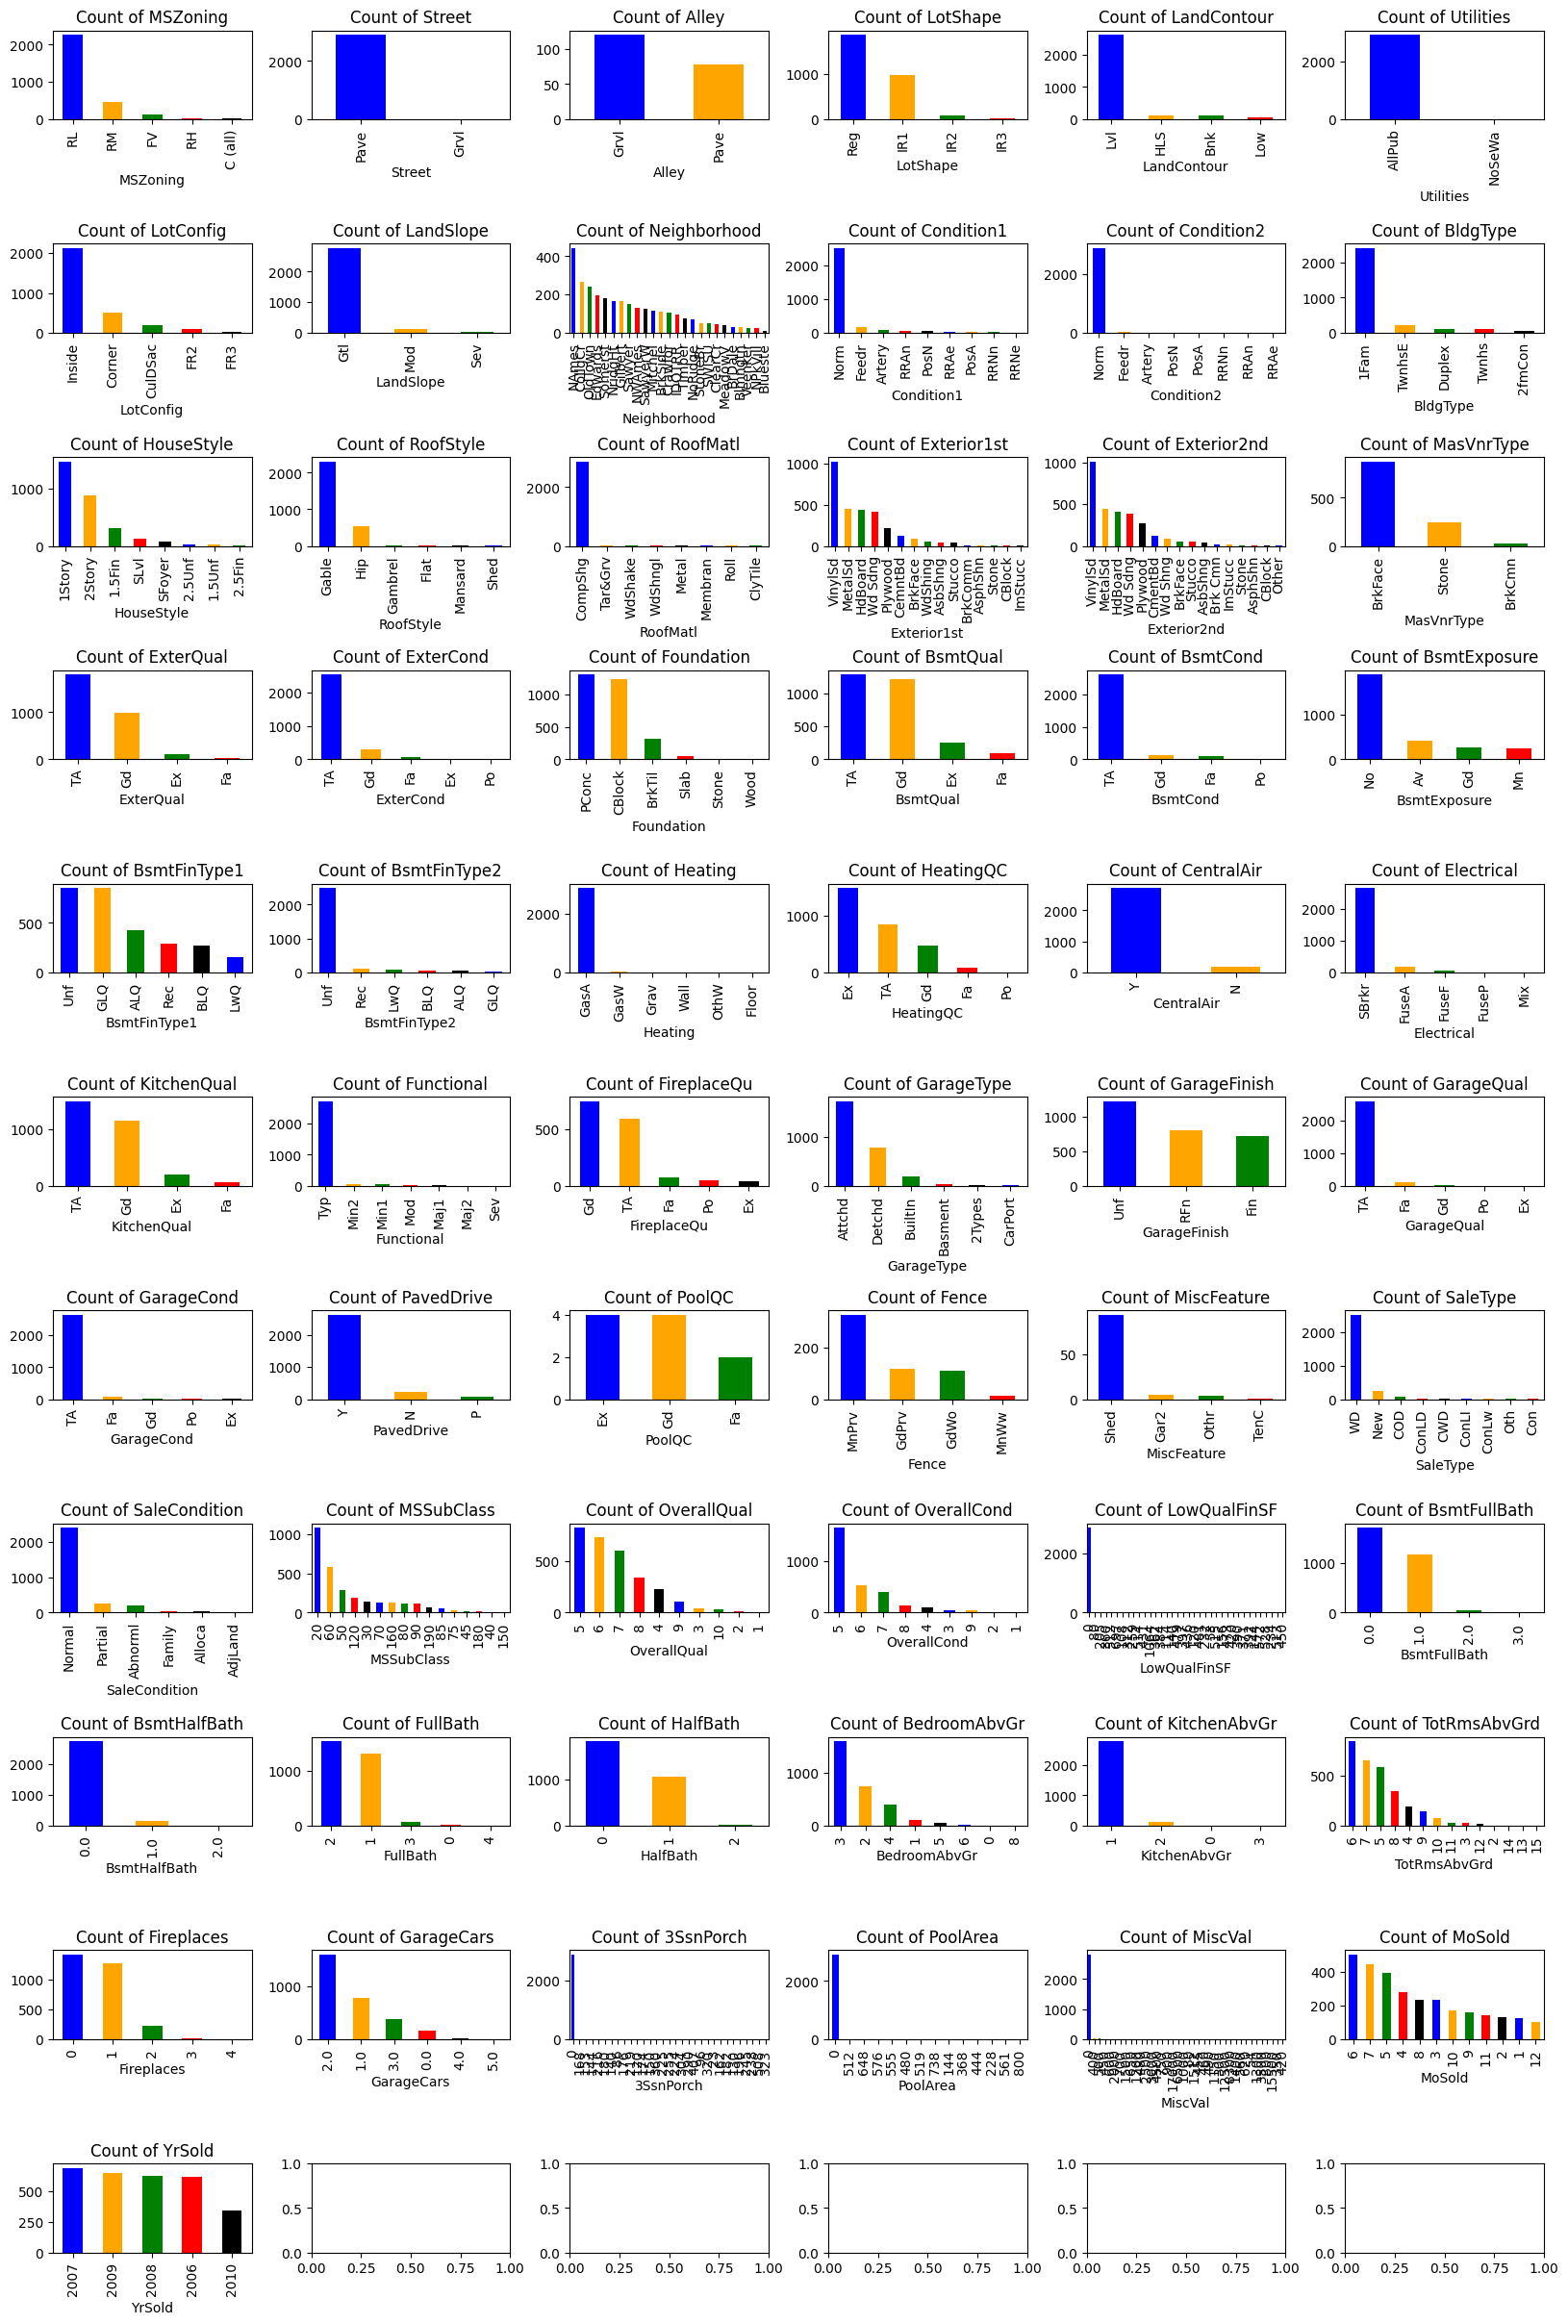

In [ ]:
fig, axs = plt.subplots(11, 6, figsize=(20, 30))

for i, col in enumerate(cat_cols, start=1):
    ax = axs.flatten()[i-1]
    df[col].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red', "black"], ax=ax)
    ax.set_title("Count of "+col)

plt.subplots_adjust(hspace=1.4)
plt.subplots_adjust(wspace=0.3)

plt.show()

In [ ]:
plt.savefig('my_graph.png')

<Figure size 640x480 with 0 Axes>

**Summary of Cat_Cols**

In [ ]:
#defines a function to print summary statistics for numerical columns in a DataFrame and then iterates over a list of numerical column names to generate and prints the summaries

def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("-"*50)

for col in cat_cols:
    cat_summary(df, col)

          MSZoning  Ratio
MSZoning                 
RL            2265  77.60
RM             460  15.76
FV             139   4.76
RH              26   0.89
C (all)         25   0.86
--------------------------------------------------
        Street  Ratio
Street               
Pave      2907  99.59
Grvl        12   0.41
--------------------------------------------------
       Alley  Ratio
Alley              
Grvl     120   4.11
Pave      78   2.67
--------------------------------------------------
          LotShape  Ratio
LotShape                 
Reg           1859  63.69
IR1            968  33.16
IR2             76   2.60
IR3             16   0.55
--------------------------------------------------
             LandContour  Ratio
LandContour                    
Lvl                 2622  89.83
HLS                  120   4.11
Bnk                  117   4.01
Low                   60   2.06
--------------------------------------------------
           Utilities  Ratio
Utilities          

# Analyzing the Numerical Variables

**Graph of Num_Cols**

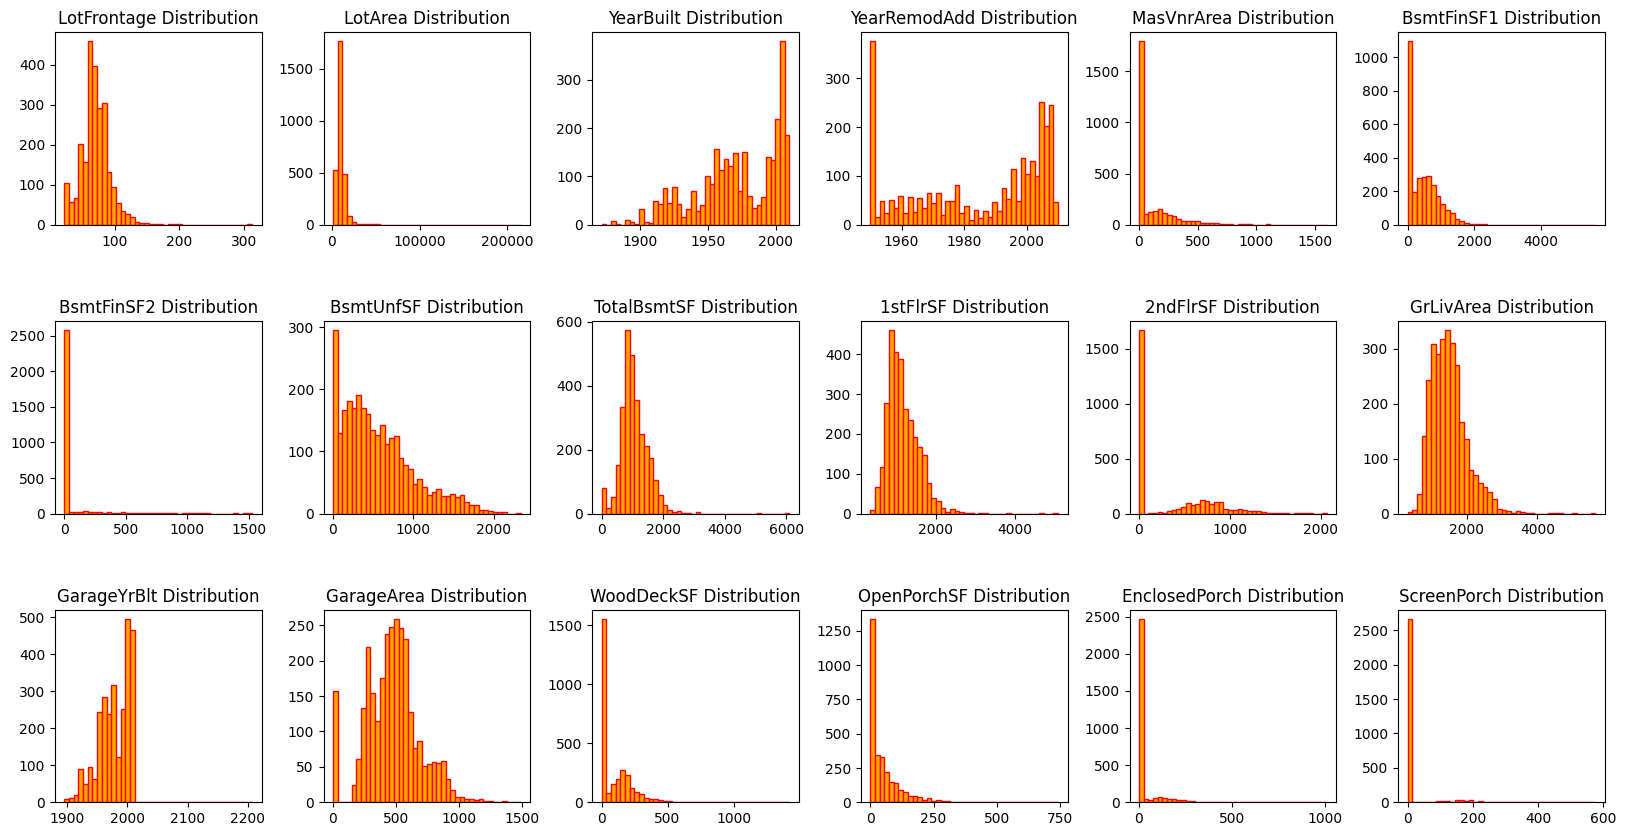

In [ ]:
num_cols.remove('Id')
num_cols.remove('SalePrice')
fig, axs = plt.subplots(3, 6, figsize=(20, 10))

for i, col in enumerate(num_cols, start=0):
    ax = axs.flatten()[i]
    ax.hist(df[col], bins=40, color='orange', edgecolor='red')
    ax.set_title(col + " Distribution")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

**Summary of Num_Cols**

In [ ]:
#defines a function to print summary statistics for numerical columns in a DataFrame and then iterates over a list of numerical column names to generate and prints the summaries
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print (dataframe[numerical_col].describe(quantiles))
    print("-"*50)

for col in num_cols:
    num_summary(df, col)

count   2433.00
mean      69.31
std       23.34
min       21.00
5%        32.00
10%       43.00
20%       53.00
30%       60.00
40%       63.00
50%       68.00
60%       73.00
70%       78.00
80%       84.00
90%       95.00
95%      107.00
99%      135.68
max      313.00
Name: LotFrontage, dtype: float64
--------------------------------------------------
count     2919.00
mean     10168.11
std       7887.00
min       1300.00
5%        3182.00
10%       4922.40
20%       7007.60
30%       7960.40
40%       8741.00
50%       9453.00
60%      10151.60
70%      11001.20
80%      12203.80
90%      14300.60
95%      17142.90
99%      33038.64
max     215245.00
Name: LotArea, dtype: float64
--------------------------------------------------
count   2919.00
mean    1971.31
std       30.29
min     1872.00
5%      1915.00
10%     1924.00
20%     1947.00
30%     1957.00
40%     1965.00
50%     1973.00
60%     1984.00
70%     1998.00
80%     2003.00
90%     2006.00
95%     2007.00
99%     2008.00


# Analysis of Target Variable

My target value is the "SalePrice" value. I want to learn each categorical columns for target value. Therefore in next step, I continued my analysis of target values.


**Graphs of Num_Cols between Target("SalePrice")**

ValueError: cannot reindex on an axis with duplicate labels

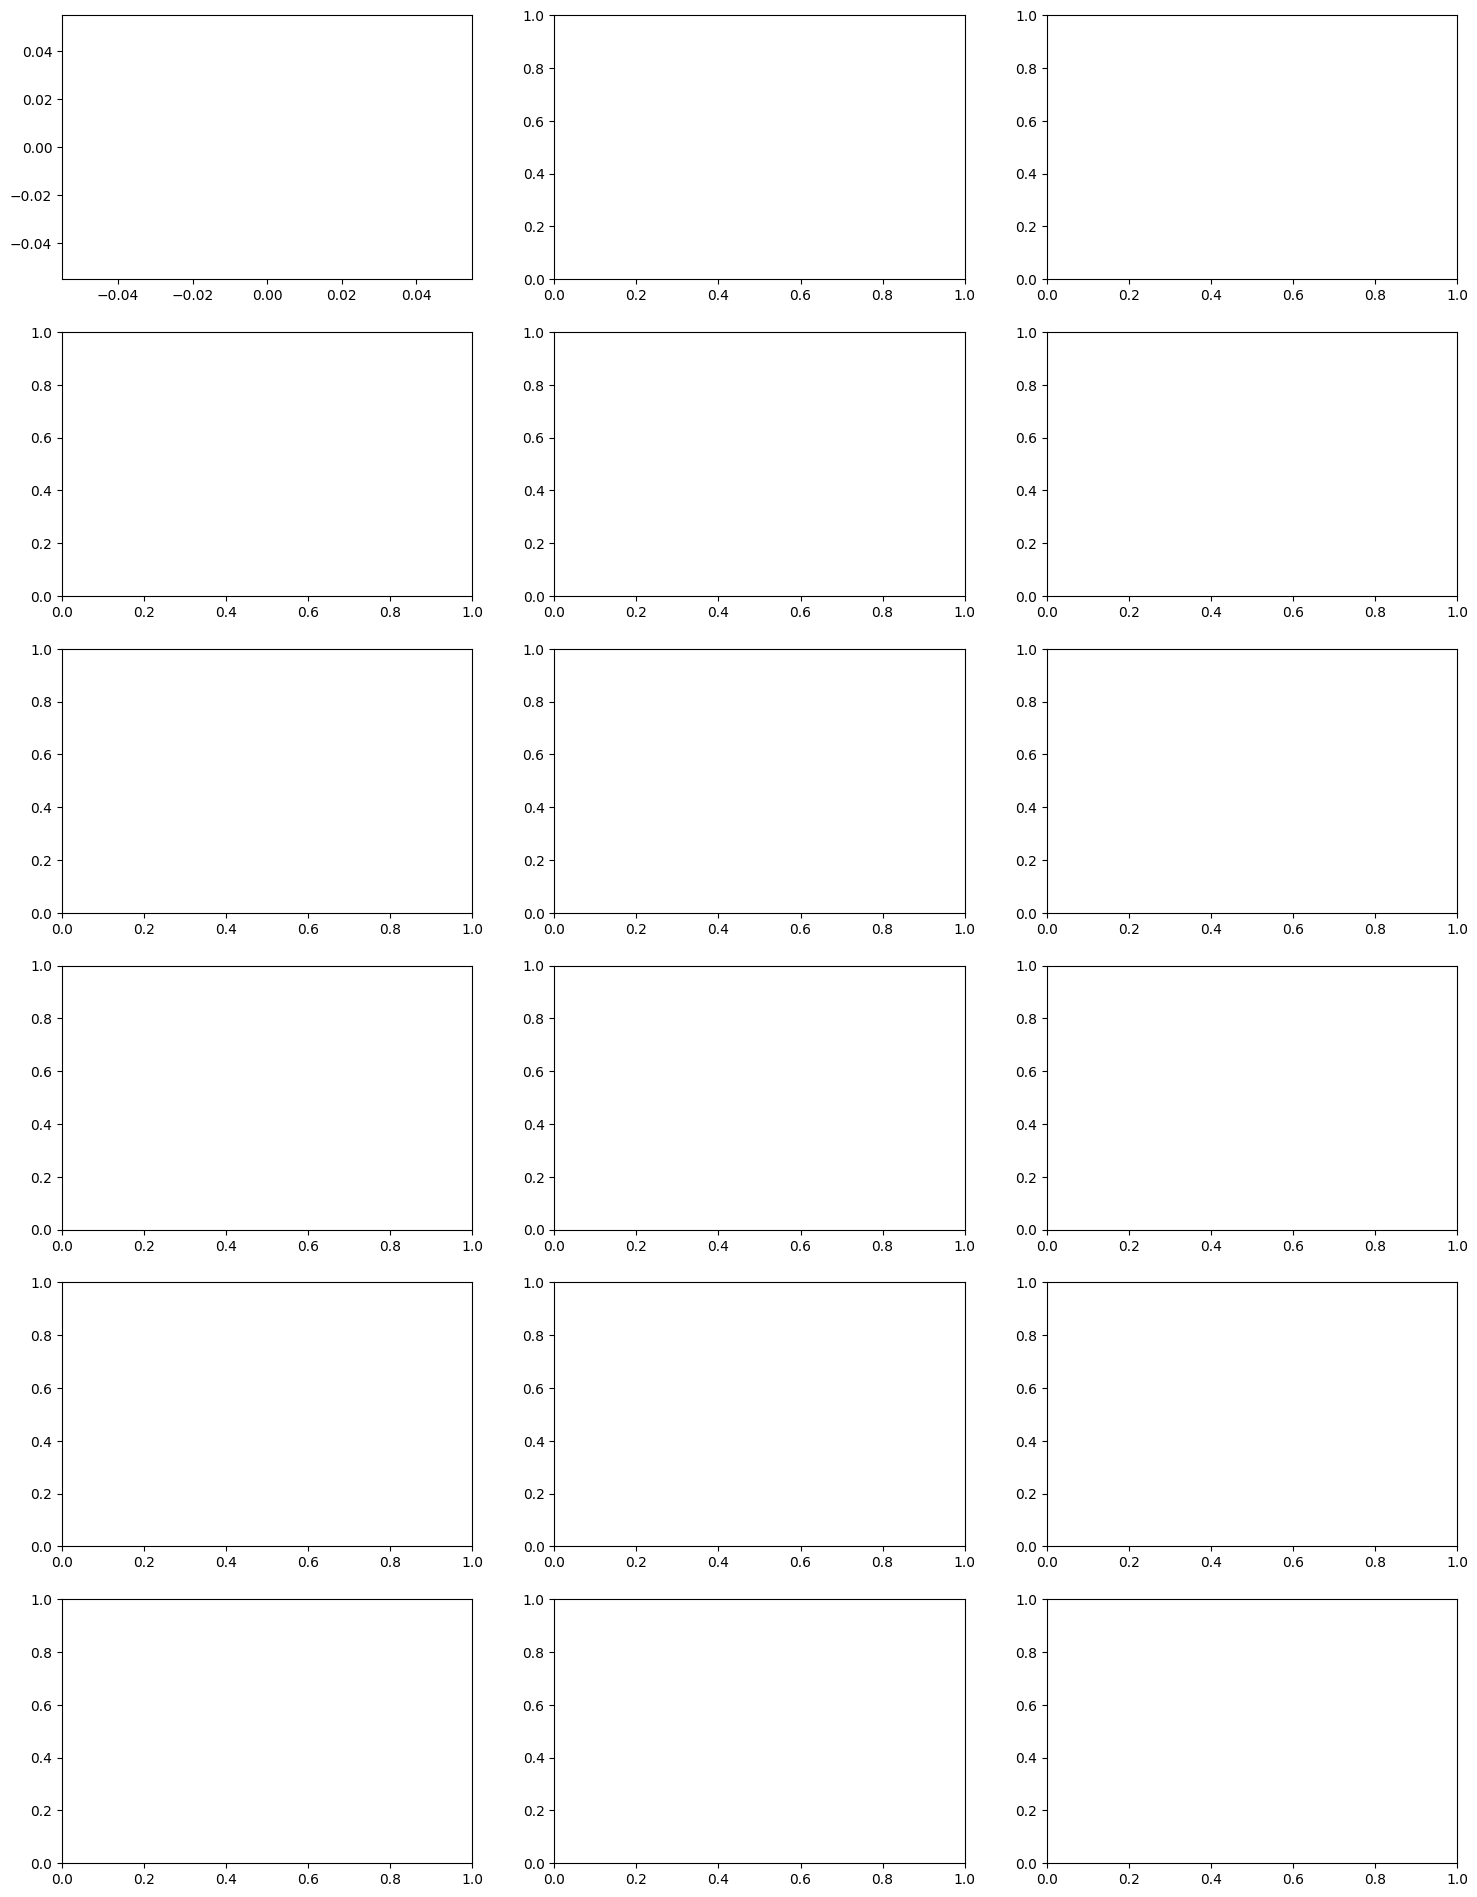

In [ ]:
 if df.duplicated().any():
    df = df.drop_duplicates().reset_index(drop=True)

fig, axs = plt.subplots(6, 3, figsize=(18, 24))
for i, col in enumerate(num_cols):
    sns.scatterplot(x=col, y="SalePrice", data=df, ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title('SalePrice by ' + col, color='green')
plt.subplots_adjust(hspace=2)
plt.tight_layout()
plt.show()

**Summary of Cat_Cols between Target("SalePrice")**

In [ ]:

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    print("-"*50)

for col in cat_cols:
    target_summary_with_cat(df, "SalePrice", col)

          TARGET_MEAN
MSZoning             
C (all)      74528.00
FV          214014.06
RH          131558.38
RL          191004.99
RM          126316.83


--------------------------------------------------
        TARGET_MEAN
Street             
Grvl      130190.50
Pave      181130.54


--------------------------------------------------
       TARGET_MEAN
Alley             
Grvl     122219.08
Pave     168000.59


--------------------------------------------------
          TARGET_MEAN
LotShape             
IR1         206101.67
IR2         239833.37
IR3         216036.50
Reg         164754.82


--------------------------------------------------
             TARGET_MEAN
LandContour             
Bnk            143104.08
HLS            231533.94
Low            203661.11
Lvl            180183.75


--------------------------------------------------
           TARGET_MEAN
Utilities             
AllPub       180950.96
NoSeWa       137500.00


-------------------------------------------------

# Observation of Outliers

**Firstly i want to observe with BoxPlot**

ValueError: cannot reindex on an axis with duplicate labels

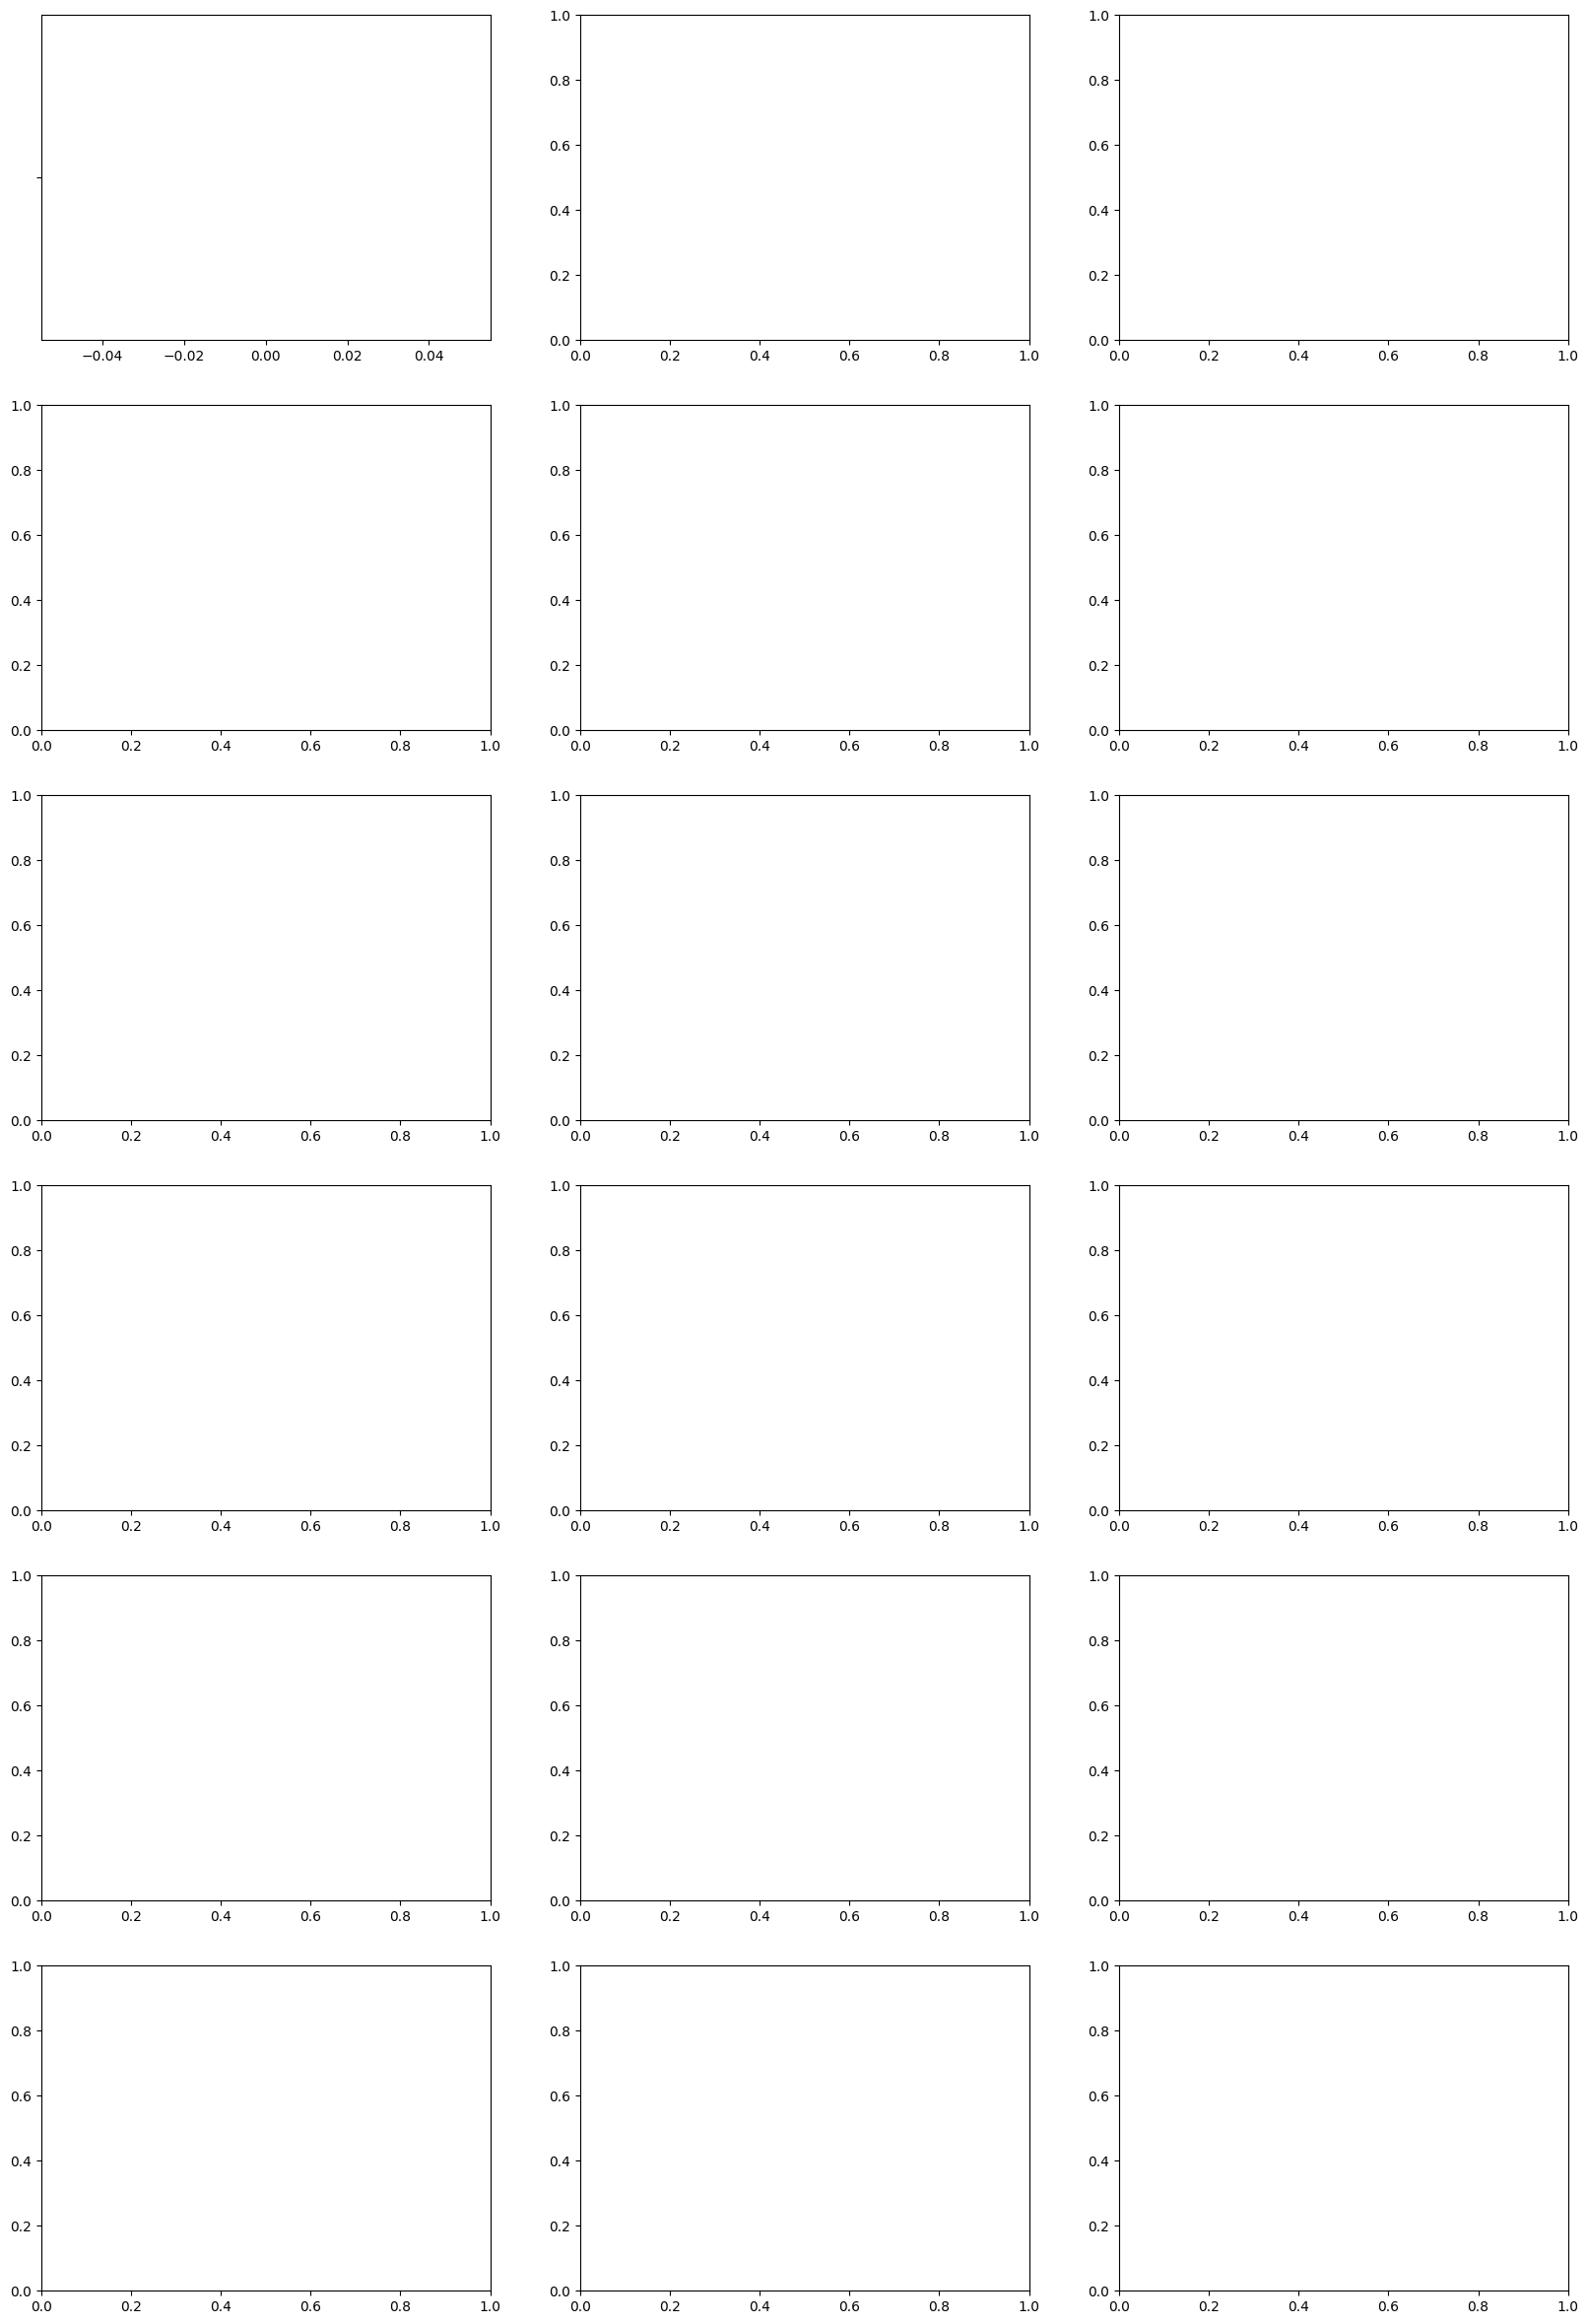

In [ ]:

fig, axs = plt.subplots(6, 3, figsize=(20, 30))
for i, col in enumerate(num_cols, start=1):
    sns.boxplot(x=df[col], ax=axs[(i-1)//3, (i-1)%3])
plt.subplots_adjust(hspace=0.3)
plt.show()

** Observing the outliers with functions**

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(f"{col:-<20}: {check_outlier(df, col)}")

LotFrontage---------: True
LotArea-------------: True
YearBuilt-----------: True
YearRemodAdd--------: False
MasVnrArea----------: True
BsmtFinSF1----------: True
BsmtFinSF2----------: True
BsmtUnfSF-----------: True
TotalBsmtSF---------: True
1stFlrSF------------: True
2ndFlrSF------------: True
GrLivArea-----------: True
GarageYrBlt---------: True
GarageArea----------: True
WoodDeckSF----------: True
OpenPorchSF---------: True
EnclosedPorch-------: True
ScreenPorch---------: True


# Observation of Missing Values

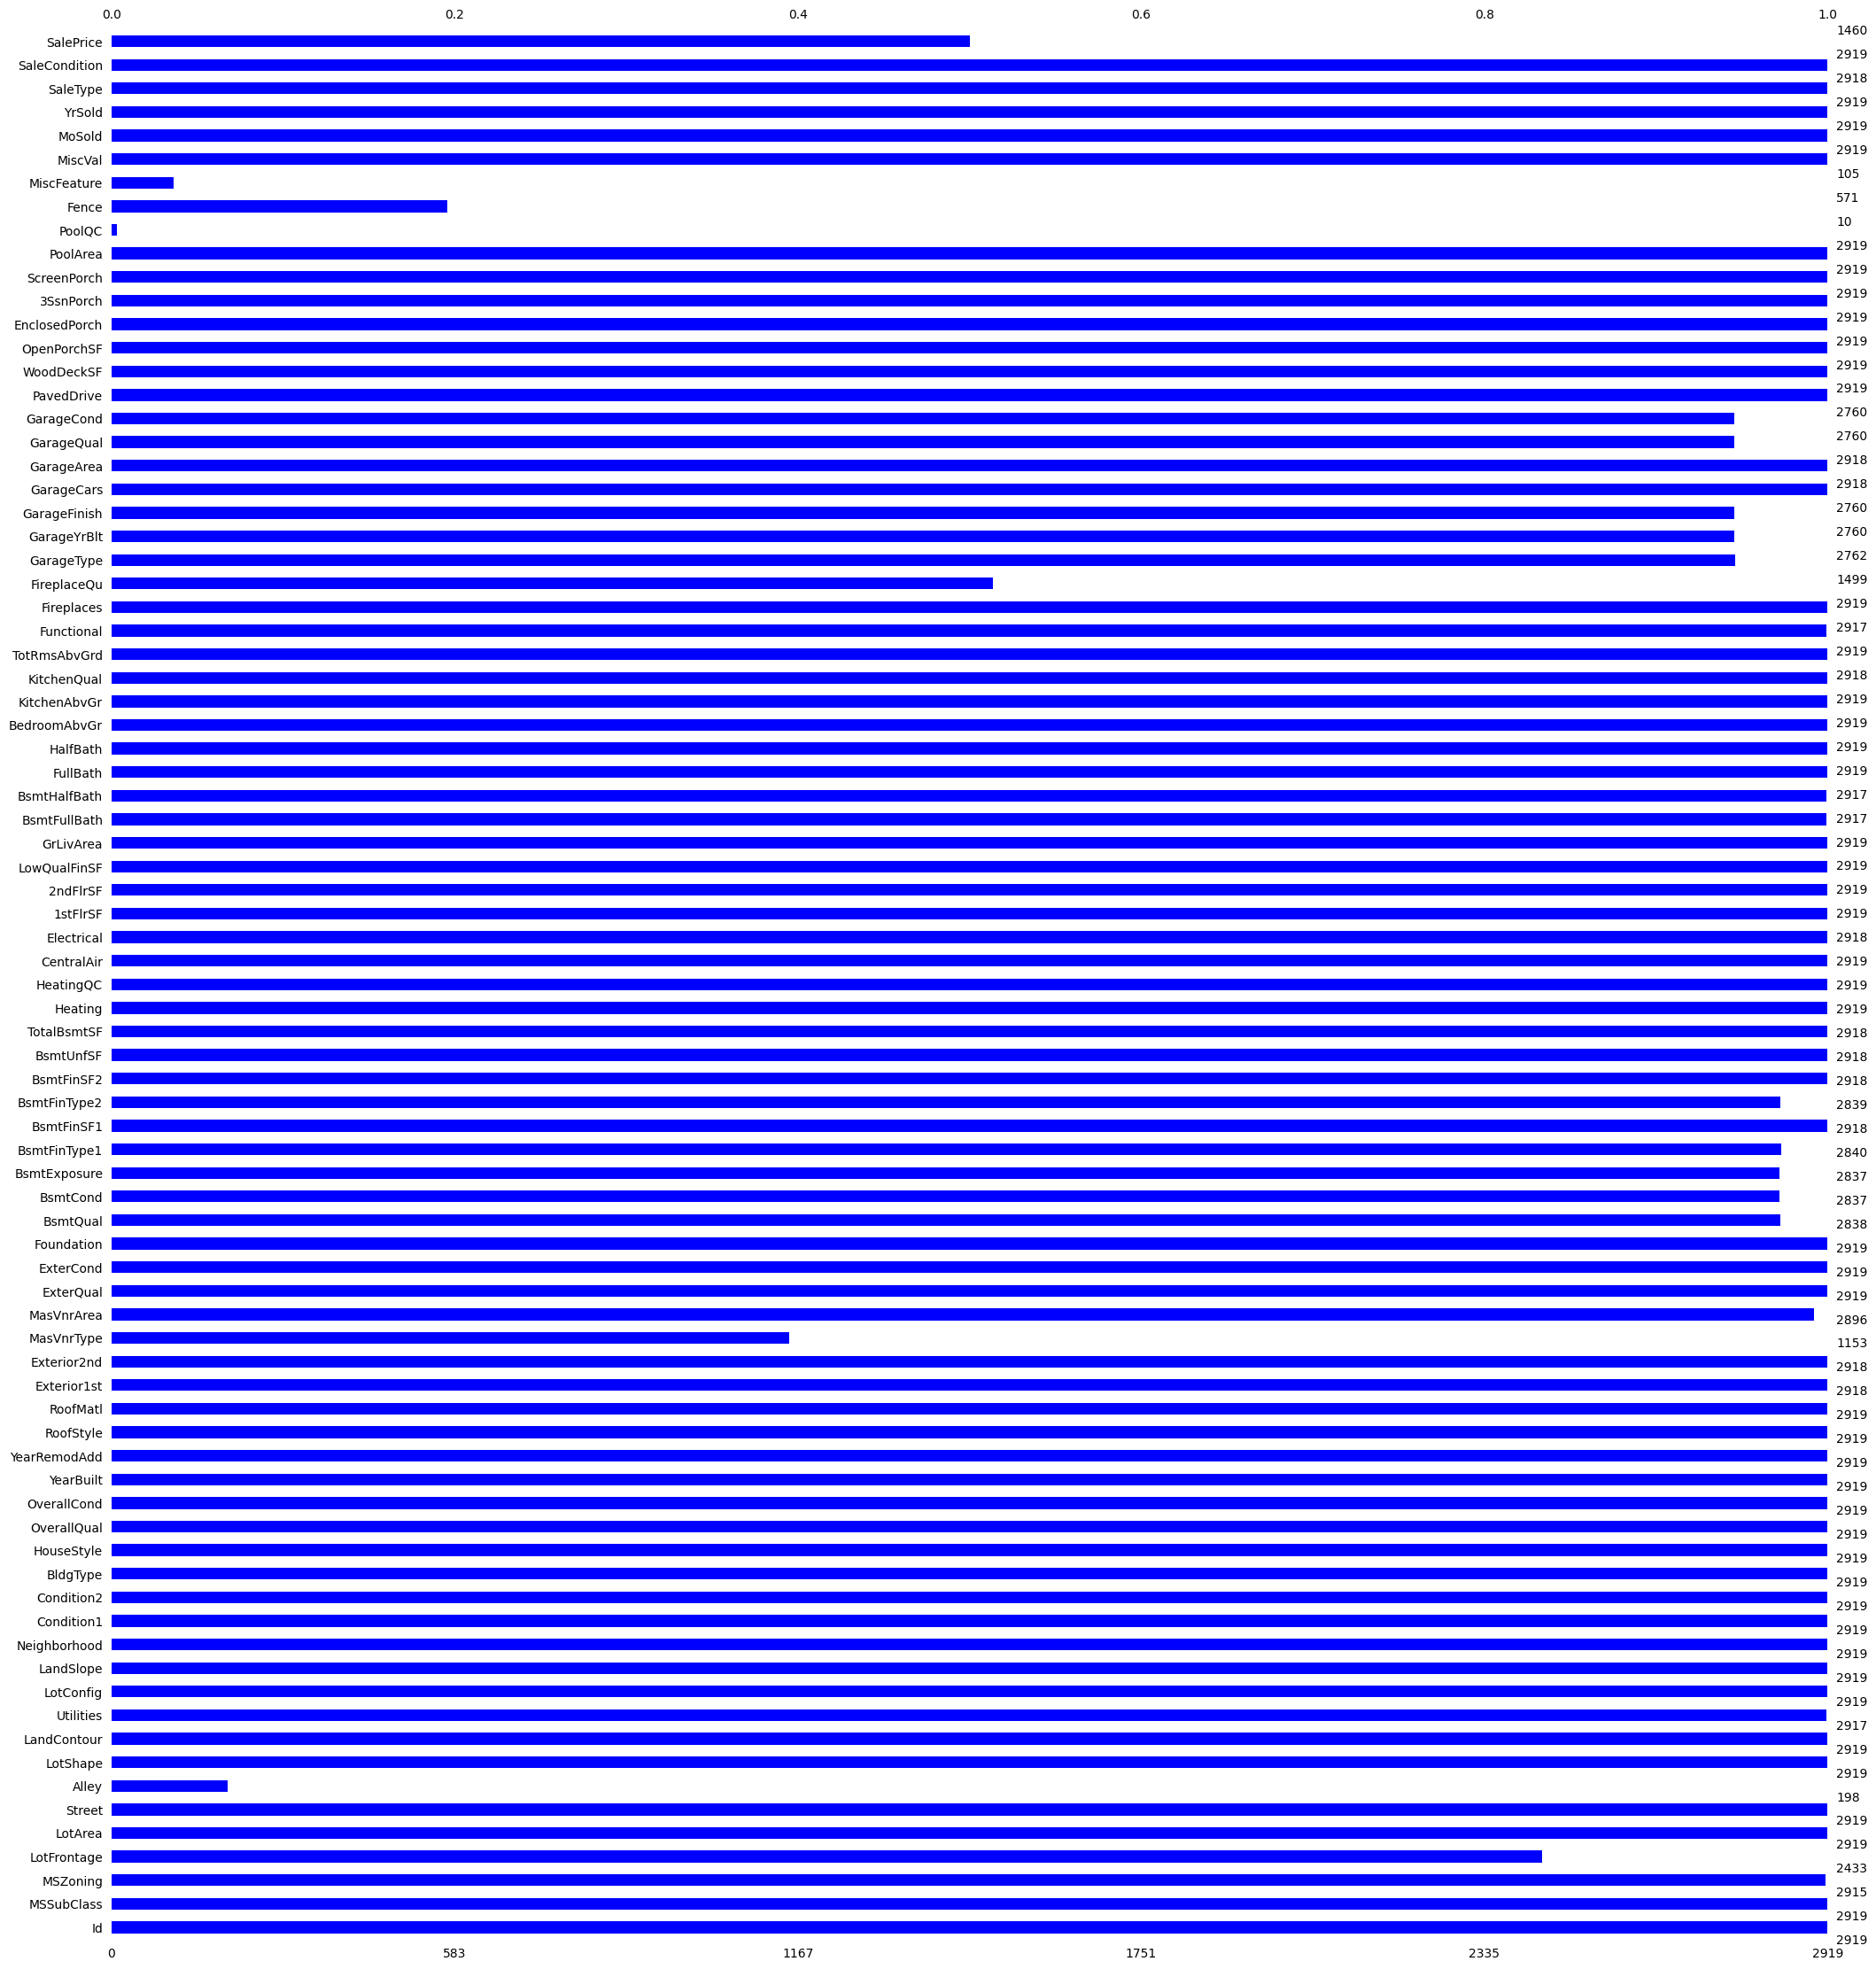

In [ ]:
msno.bar(df, color="blue",fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.show()

**Missing values numbers and ratios**

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
MasVnrType      1766  60.50
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageCond       159   5.45
GarageYrBlt      159   5.45
GarageFinish     159   5.45
GarageQual       159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrArea        23   0.79
MSZoning           4   0.14
Functional         2   0.07
BsmtHalfBath       2   0.07
BsmtFullBath       2   0.07
Utilities          2   0.07
KitchenQual        1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03
Electrical         1

# Feature Engineering

**Adjust Outliers**

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(f"{col:-<20} : {check_outlier(df, col)}")

**Replace Outliers With Thresholds**

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)


for col in num_cols:
    print(f"{col:-<20} : {check_outlier(df, col)}")

LotFrontage--------- : False
LotArea------------- : False
YearBuilt----------- : False
YearRemodAdd-------- : False
MasVnrArea---------- : False
BsmtFinSF1---------- : False
BsmtFinSF2---------- : False
BsmtUnfSF----------- : False
TotalBsmtSF--------- : False
1stFlrSF------------ : False
2ndFlrSF------------ : False
GrLivArea----------- : False
GarageYrBlt--------- : False
GarageArea---------- : False
WoodDeckSF---------- : False
OpenPorchSF--------- : False
EnclosedPorch------- : False
ScreenPorch--------- : False


**Adjust Missing Values**

In [ ]:
for col in cat_cols:
    if df[col].dtype != 'object':
        df[col] = df[col].astype('object')


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns



In [ ]:
df=df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 40) else x, axis=0)

missing_values_table(df)

             n_miss  ratio
SalePrice      1459  49.98
LotFrontage     486  16.65
GarageYrBlt     159   5.45
MasVnrArea       23   0.79
BsmtFinSF1        1   0.03
BsmtFinSF2        1   0.03
BsmtUnfSF         1   0.03
TotalBsmtSF       1   0.03
GarageArea        1   0.03


In [ ]:
for i in num_cols:
    df[i].fillna(df.groupby("Neighborhood")[i].transform("mean"), inplace=True)

missing_values_table(df)

           n_miss  ratio
SalePrice    1459  49.98


# Rare Encoding

**Rare Analysis Between Target Valuables**

In [ ]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
C (all)      25   0.01     74528.00
FV          139   0.05    214014.06
RH           26   0.01    131558.38
RL         2269   0.78    191004.99
RM          460   0.16    126316.83


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Grvl       12   0.00    130190.50
Pave     2907   1.00    181130.54


Alley : 2
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl    2841   0.97    181294.52
Pave      78   0.03    168000.59


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968   0.33    206101.67
IR2          76   0.03    239833.37
IR3          16   0.01    216036.50
Reg        1859   0.64    164754.82


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            117   0.04    143104.08
HLS            120   0.04    231533.94
Low             60   0.02    203661.1

In [ ]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df


df = rare_encoder(df, 0.02)

rare_analyser(df, "SalePrice", cat_cols)


MSZoning : 4
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
FV          139   0.05    214014.06
RL         2269   0.78    191004.99
RM          460   0.16    126316.83
Rare         51   0.02    109623.62


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Pave     2907   1.00    181130.54
Rare       12   0.00    130190.50


Alley : 2
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl    2841   0.97    181294.52
Pave      78   0.03    168000.59


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968   0.33    206101.67
IR2          76   0.03    239833.37
Rare         16   0.01    216036.50
Reg        1859   0.64    164754.82


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            117   0.04    143104.08
HLS            120   0.04    231533.94
Low             60   0.02    203661.11
Lvl           2622   0.90    18018

**Define the state of not being in the following variables with 0 and the state of being with 1.**

In [ ]:
new = ["WoodDeckSF","GarageArea","BsmtFinSF2","EnclosedPorch","OpenPorchSF", "ScreenPorch","MasVnrArea","Fireplaces","MiscVal","3SsnPorch","LowQualFinSF","PoolArea"]
for item in new:
    name = "new_" + item
    df[name] = np.where(df[item] > 0, 1, 0)

**New Variable Total Porch Area**

In [ ]:
#adding the porch related features into one feature
df["new_totalPorchArea"]= df["EnclosedPorch"] +df["OpenPorchSF"]+df["ScreenPorch"]+df["3SsnPorch"]

df['new_luxury'] = (df["new_GarageArea"] + df["new_EnclosedPorch"] + df["new_OpenPorchSF"] + df["new_ScreenPorch"] + df["new_3SsnPorch"] + df["new_PoolArea"])
df['new_luxury'] = (df['new_luxury'] >=3).astype(int)


**Age of Building**

In [ ]:
date = 2011
built=["YearBuilt","YearRemodAdd","GarageYrBlt"]

for i in built:
    df["new_age"+i]=date-df[i]
    df.drop(columns=i, axis=1 ,inplace=True)


bins_built = [0, 5, 15, 35, 75, np.inf]
labels_built = ['Very_New', 'New', 'Moderate', 'Old', 'Very_Old']
df["new_age_category"] = pd.cut(df["new_ageYearBuilt"], bins=bins_built, labels=labels_built, right=False)


bins_remodel = [1, 6, 16, 36, np.inf]
labels_remodel = [ 'Recently Renovated', 'Moderately Renovated', 'Old Renovated', 'Very Old Renovated']
df["new_remodel_age_category"] = pd.cut(df["new_ageYearRemodAdd"], bins=bins_remodel, labels=labels_remodel, right=False)



# Encoding

**Label Encoding**

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]


for col in binary_cols:
    label_encoder(df, col)

df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_WoodDeckSF,new_GarageArea,new_BsmtFinSF2,new_EnclosedPorch,new_OpenPorchSF,new_ScreenPorch,new_MasVnrArea,new_Fireplaces,new_MiscVal,new_3SsnPorch,new_LowQualFinSF,new_PoolArea,new_totalPorchArea,new_luxury,new_ageYearBuilt,new_ageYearRemodAdd,new_ageGarageYrBlt,new_age_category,new_remodel_age_category
368,1829,30,RM,50.00,8635,0,0,Reg,Lvl,0,Inside,Gtl,BrkSide,Norm,0,1Fam,1Story,5,5,Hip,0,Wd Sdng,Wd Sdng,BrkFace,0.00,TA,Fa,BrkTil,TA,TA,No,LwQ,134.00,Unf,0.00,938.00,1072.00,0,TA,1,SBrkr,1072.00,0,0,1072.00,1.00,0.00,1,0,2,1,TA,5,Typ,0,Gd,Detchd,Unf,5.00,960.00,Fa,TA,P,0,0,0,0,0,0,0,MnPrv,1,0,8,2009,WD,Normal,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,86.00,61.00,29.00,Very_Old,Very Old Renovated
611,612,80,RL,81.11,10395,0,0,IR1,Lvl,0,FR2,Gtl,NWAmes,Norm,0,1Fam,SLvl,6,6,Gable,0,HdBoard,HdBoard,BrkFace,233.00,TA,TA,CBlock,Gd,TA,Av,ALQ,605.00,Unf,0.00,427.00,1032.00,0,TA,1,SBrkr,1032.00,0,0,1032.00,0.00,1.00,2,0,3,1,TA,6,Typ,1,TA,Attchd,Unf,2.00,564.00,TA,TA,Y,0,0,0,0,0,0,0,MnPrv,1,500,7,2007,WD,Normal,148000.00,0,1,0,0,0,0,1,1,1,0,0,0,0,0,33.00,33.00,33.00,Moderate,Old Renovated
426,1887,20,RL,70.00,8750,0,0,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,0,1Fam,1Story,7,5,Gable,0,VinylSd,VinylSd,BrkFace,209.00,Gd,TA,PConc,Gd,TA,Av,GLQ,1111.00,Unf,0.00,306.00,1417.00,0,Ex,1,SBrkr,1417.00,0,0,1417.00,1.00,0.00,2,0,3,1,Gd,7,Typ,1,TA,Attchd,Unf,2.00,511.00,TA,TA,Y,60,0,0,0,0,0,0,MnPrv,1,0,8,2009,WD,Normal,NaN,1,1,0,0,0,0,1,1,0,0,0,0,0,0,14.00,13.00,14.00,New,Moderately Renovated
471,472,60,RL,92.00,11952,0,0,Reg,Lvl,0,Inside,Gtl,NWAmes,Rare,0,1Fam,2Story,7,6,Rare,1,Rare,Plywood,BrkFace,0.00,TA,TA,CBlock,Gd,TA,No,Unf,0.00,Unf,0.00,808.00,808.00,0,TA,1,SBrkr,1161.00,808,0,1969.00,0.00,0.00,2,1,3,1,TA,8,Typ,1,Gd,Attchd,RFn,2.00,534.00,TA,TA,Y,0,0,0,0,0,0,0,MnPrv,1,0,11,2007,WD,Normal,190000.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,34.00,34.00,34.00,Moderate,Old Renovated
462,1923,60,RL,79.18,9839,0,0,IR1,Lvl,0,CulDSac,Gtl,Timber,Norm,0,1Fam,2Story,6,8,Gable,0,MetalSd,MetalSd,BrkFace,0.00,TA,Gd,PConc,Gd,TA,No,ALQ,462.00,Unf,0.00,250.00,712.00,0,Ex,1,SBrkr,1375.00,862,0,2237.00,0.00,0.00,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,Fin,2.00,440.00,TA,TA,Y,305,24,0,0,0,0,0,MnPrv,1,2500,2,2009,WD,Normal,NaN,1,1,0,0,1,0,0,1,1,0,0,0,24,0,31.00,5.00,31.00,Moderate,Recently Renovated


**One Hot Encoding**

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

ohe_cols = [col for col in df.columns if  17 >= df[col].nunique() > 2]

df=one_hot_encoder(df, ohe_cols)

df.sample(5)

,Id,LotFrontage,LotArea,Street,Alley,Utilities,Condition2,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,MiscFeature,MiscVal,SalePrice,new_WoodDeckSF,new_GarageArea,new_BsmtFinSF2,new_EnclosedPorch,new_OpenPorchSF,new_ScreenPorch,new_MasVnrArea,new_Fireplaces,new_MiscVal,new_3SsnPorch,new_LowQualFinSF,new_PoolArea,new_totalPorchArea,new_luxury,new_ageYearBuilt,new_ageYearRemodAdd,new_ageGarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM,MSZoning_Rare,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Gd,ExterQual_Rare,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_LwQ,BsmtFinType2_Rare,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_Rare,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Functional_Min2,Functional_Rare,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Gd,FireplaceQu_Rare,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolArea_144,PoolArea_228,PoolArea_368,PoolArea_444,PoolArea_480,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_561,PoolArea_576,PoolArea_648,PoolArea_738,PoolArea_800,Fence_GdWo,Fence_MnPrv,Fence_Rare,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,new_age_category_Ne

# Scaling

In [ ]:
columns_to_scale = [col for col in df.columns if col not in ['Id', 'SalePrice']]
df_scaled = df.copy()
df_scaled[columns_to_scale] = MinMaxScaler().fit_transform(df[columns_to_scale])
df_scaled.head()

,Id,LotFrontage,LotArea,Street,Alley,Utilities,Condition2,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,MiscFeature,MiscVal,SalePrice,new_WoodDeckSF,new_GarageArea,new_BsmtFinSF2,new_EnclosedPorch,new_OpenPorchSF,new_ScreenPorch,new_MasVnrArea,new_Fireplaces,new_MiscVal,new_3SsnPorch,new_LowQualFinSF,new_PoolArea,new_totalPorchArea,new_luxury,new_ageYearBuilt,new_ageYearRemodAdd,new_ageGarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM,MSZoning_Rare,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Gd,ExterQual_Rare,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_LwQ,BsmtFinType2_Rare,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_Rare,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Functional_Min2,Functional_Rare,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Gd,FireplaceQu_Rare,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolArea_144,PoolArea_228,PoolArea_368,PoolArea_444,PoolArea_480,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_561,PoolArea_576,PoolArea_648,PoolArea_738,PoolArea_800,Fence_GdWo,Fence_MnPrv,Fence_Rare,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,new_age_category_Ne

# Modelling

**Splitting Train and Test**

In [ ]:
df_test = df_scaled[df_scaled["SalePrice"].isna()]
df_train = df_scaled.dropna(subset = ["SalePrice"])


**Log Convertion for SalePrice**

In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train.head()

,Id,LotFrontage,LotArea,Street,Alley,Utilities,Condition2,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,MiscFeature,MiscVal,SalePrice,new_WoodDeckSF,new_GarageArea,new_BsmtFinSF2,new_EnclosedPorch,new_OpenPorchSF,new_ScreenPorch,new_MasVnrArea,new_Fireplaces,new_MiscVal,new_3SsnPorch,new_LowQualFinSF,new_PoolArea,new_totalPorchArea,new_luxury,new_ageYearBuilt,new_ageYearRemodAdd,new_ageGarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM,MSZoning_Rare,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Gd,ExterQual_Rare,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_LwQ,BsmtFinType2_Rare,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_Rare,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Functional_Min2,Functional_Rare,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Gd,FireplaceQu_Rare,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolArea_144,PoolArea_228,PoolArea_368,PoolArea_444,PoolArea_480,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_561,PoolArea_576,PoolArea_648,PoolArea_738,PoolArea_800,Fence_GdWo,Fence_MnPrv,Fence_Rare,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,new_age_category_Ne

In [ ]:
X = df_train.drop(["Id",'SalePrice'], axis=1)
y = df_train[["SalePrice"]]

# Linear Regression

In [ ]:
Linear_model = LinearRegression().fit(X, y)


In [ ]:
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, f1_score
y_pred = Linear_model.predict(X)
print("MSE: ", np.sqrt(mean_squared_error(y, y_pred)))

# Calculate MAE
mae = mean_absolute_error(y, y_pred)


print("MAE:", mae)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE score:", rmse)

MSE:  0.09792994123822546
MAE: 0.06789227005839901
RMSE score: 0.09792994123822546


# XGB Regression

In [ ]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


XGB_model = XGBRegressor()
XGB_model.fit(X, y)

y_pred = XGB_model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE score:", rmse)
mae = mean_absolute_error(y, y_pred)


print("MAE:", mae)
print("MSE: ", np.sqrt(mean_squared_error(y, y_pred)))


RMSE score: 0.009393201670315807
MAE: 0.006710997545934062
MSE:  0.009393201670315807


**XGBRegressor HiperParametre Analysis**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

XGB_params = {"n_estimators": [1200,1250,1150]}

XGB_model_grid= GridSearchCV(XGB_model, XGB_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)
XGB_model_final = XGB_model.set_params(**XGB_model_grid.best_params_, random_state=17).fit(X, y)


y_pred = XGB_model_final.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE score:", rmse)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
RMSE score: 0.0011363676843325582


# Future Importance

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    colors = sns.color_palette("viridis", len(feature_imp))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:20], palette = colors)

    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

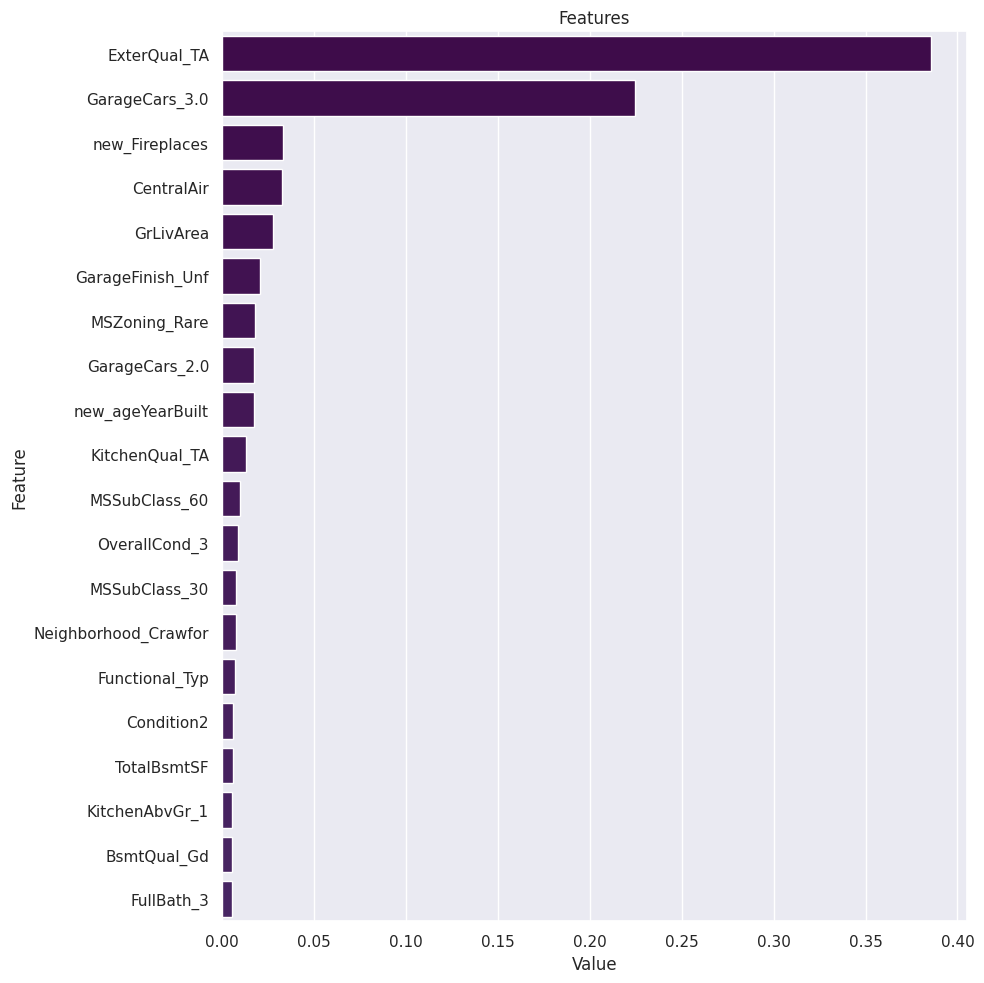

In [ ]:
plot_importance(XGB_model_final, X)


# Output for Submission

**O XGB**